# Notebook setup

**Don't forget to change the path in this cell so that Python can find the datasets for this week.**

In [ ]:
# Change this to point to your 2-arcpy-intro\data folder.
data_folder = r'C:\Users\tyler\Desktop\Teaching\Python\GEOG_4860\Week_3\data'

In [ ]:
import os
import sys

sys.path.append(data_folder)
import classtools

import arcpy

arcpy.env.workspace = data_folder
arcpy.env.overwriteOutput = True

%matplotlib inline

# Working with environment settings

You've seen how to set the `workspace` and `overwriteOutput` environment variables, but you can use any environment settings with ArcPy that you can use with the tools in ArcMap. For example, say you wanted to use the [output extent](https://pro.arcgis.com/en/pro-app/tool-reference/environment-settings/output-extent.htm) setting to extract a subset of the city boundaries from the cities shapefile. If the output extent environment setting is set, and you use a geoprocessing tool that honors it, then the output from the tool will only include the geometries that fall within that extent. 

Here are the coordinates for the extent we're going to use when trying this out:

- Min x: 400000
- Max x: 500000
- Min y: 4400000
- Max y: 4500000

The first thing you need to do is create an [Extent](https://pro.arcgis.com/en/pro-app/arcpy/classes/extent.htm) object from those coordinates.

```
Extent({XMin}, {YMin}, {XMax}, {YMax}, {ZMin}, {ZMax}, {MMin}, {MMax}, {spatial_reference})
```

In [ ]:
# Create an extent object.
out_extent = arcpy.Extent(400000, 4400000, 500000, 4500000)

In order for an environment setting to have an effect, it has to be set on the [env](https://pro.arcgis.com/en/pro-app/arcpy/classes/env.htm) object before you run the geoprocessing tool, so let's do that now. 

In [ ]:
# Set the geoprocessing extent on the environment so that it'll be used.
arcpy.env.extent = out_extent

Now any geoprocessing tools that you use during this Python session will only process data that falls in that extent (assuming the tool uses that particular environment variable-- you can look that up in the tool's documentation). From the bottom of the [FeatureClassToFeatureClass](https://pro.arcgis.com/en/pro-app/tool-reference/conversion/feature-class-to-feature-class.htm) documentation, you can see that it honors this environment variable:

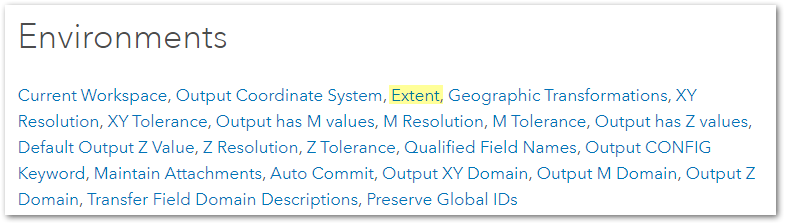

Let's use this tool to extract a subset of the features from cities.shp. Here's the syntax:

```
FeatureClassToFeatureClass_conversion(in_features, out_path, out_name, {where_clause}, 
                                      {field_mapping}, {config_keyword})
```

This tool requires that you specify the output file in two steps. The `out_path` parameter is the folder or geodatabase that you want to put the output in, and the `out_name` parameter is the filename. You'll use the folder that's set in the `arcpy.env.workspace` environment setting for the output path.

In [ ]:
# Extract the cities from cities.shp that fall within the geoprocessing extent environment variable 
# set above and save them into cities_subset.shp.
arcpy.FeatureClassToFeatureClass_conversion('cities.shp', arcpy.env.workspace, 'cities_subset.shp')

Now plot the results on top of the original. The original cities shapefile should be shown in blue and your new subsetted data in yellow. The extent that you used is shown in red. Notice that setting a geoprocessing extent selects everything that overlaps the extent, so the exported polygons aren't necessarily completely contained within the extent of interest and might poke out of the rectangle.

In [ ]:
# Use classtools to plot the extracted cities (yellow) on top of the original (blue). 
# The geoprocessing extent is shown in red.
classtools.plot(['cities.shp', 'cities_subset.shp', out_extent], ['blue', 'yellow', 'red'], extent='cities_subset.shp')

This has nothing to do with ArcPy so you don't need to worry about it unless you want to play with the classtools module, but if you want to plot more than one dataset with the `classtools.plot()` function, you need to pass them all as a list like that last bit of code did. If you don't provide a list of colors, then it will choose colors for you. The `extent` parameter tells it to zoom into the extent of the cities_subset shapefile instead of showing the full extent of all plotted datasets.

You constructed the `extent` object yourself for the last subset example, but here's an example that uses the extent of the Cache shapefile instead, which you can get with `Describe`. 

In [ ]:
# Describe the cache.shp shapefile and use that to get its extent.
# Set that as the geoprocessing extent.
arcpy.env.extent = arcpy.Describe('Cache.shp').extent

# Copy cities.shp to cache_subset.shp. Since the geoprocessing
# extent is set to Cache County, only those cities will be copied.
arcpy.FeatureClassToFeatureClass_conversion('cities.shp', arcpy.env.workspace, 'cache_subset.shp')

When you plot it this time, the county outline is drawn in black and the red box is the extent of the county polygon. Again, the original shapefile is blue and the subsetted one is yellow. Notice that cities outside of Cache County were selected, because it used the extent (the red box), not the county boundary.

In [ ]:
# Use classtools to plot the extracted cities (yellow) on top of the original (blue). 
# The county outline is black and its extent (which is what we used for the 
# geoprocessing extent) is shown in red.
classtools.plot(['Cache.shp', 'cities.shp', 'cache_subset.shp', arcpy.env.extent], 
                ['white', 'blue', 'yellow', 'red'], 'cache_subset.shp')

Most geoprocessing tools honor multiple environment settings, and you can set as many of them as you want. For example, you also could've set `arcpy.env.outputCoordinateSystem` to have the data reprojected as it was extracted.

You can clear out an environment variable by setting it to `None`.

In [ ]:
arcpy.env.extent = None

Now you can use geoprocessing tools without them being affected by this environment setting.

# Problem 1

Remember when you used [Project](https://pro.arcgis.com/en/pro-app/tool-reference/data-management/project.htm) in the spatial references notebook to reproject the cities shapefile? You're going to reproject using a different method now. 

**1A.** Set the `outputCoordinateSystem` [environment variable](https://pro.arcgis.com/en/pro-app/arcpy/classes/env.htm) to the spatial reference used by `cities_albers.shp` (it might be useful to follow the "Learn more about outputCoordinateSystem" link in the documentation).

**1B.** Now use [FeatureClassToFeatureClass](https://pro.arcgis.com/en/pro-app/tool-reference/conversion/feature-class-to-feature-class.htm) to copy `cities.shp` to another shapefile called `problem1.shp`. If you set the `outputCoordinateSystem` environment variable correctly in 1A, then the data will automatically be reprojected to Albers when the `FeatureClassToFeatureClass` tool runs.

Now plot cities_albers.shp and problem1.shp. If your plot is yellow, that means that problem1.shp didn't draw on top of cities_albers.shp, so something went wrong and it wasn't reprojected. If the plot is blue, that means that your new shapefile was automatically reprojected and is being drawn on top of the original cities_albers shapefile, so you're good.

In [ ]:
classtools.plot(['cities_albers.shp', 'problem1.shp'], ['yellow', 'blue'], 
                arcpy.Extent(-1431000, 2015000, -1246000, 2097600))

Again, you can set the environment variable you just changed back to `None` so that it doesn't mess with anything else you might do later.

In [ ]:
arcpy.env.outputCoordinateSystem = None

**Make sure you've saved your notebook!**